<h1 align="center"><strong>Clusterización de casos positivos de COVID19 en Perú usando K-means</strong></h1>

---

 - Dataset original:  [Casos positivos por COVID-19](https://www.datosabiertos.gob.pe/dataset/casos-positivos-por-covid-19-ministerio-de-salud-minsa)-[Ministerio de Salud - MINSA].
 - Autor: [Renzo Alexis Guerrero Huayta](https://github.com/renzoguerrero17)

---





# **Conectando Colab con Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
import os
os.chdir("/content/drive/MyDrive/Electivos/IAA/Evaluaciones/PC2/Clustering")

# **1.Análisis exploratorio de datos**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [77]:
df = pd.read_csv(r"positivos_covid.csv",sep = ";")

In [78]:
# Visualizacion global de los datos
df.head()

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20210109,7320cabdc1aaca6c59014cae76a134e6,TUMBES,ZARUMILLA,ZARUMILLA,PR,48.0,FEMENINO,20200511.0
1,20210109,cecdbf10074dbc011ae05b3cbd320a6f,TUMBES,ZARUMILLA,ZARUMILLA,PR,57.0,FEMENINO,20200530.0
2,20210109,566af4276cbe9359abe93f9aa86396c3,TUMBES,ZARUMILLA,ZARUMILLA,PR,30.0,FEMENINO,20200429.0
3,20210109,027561e9d126e7c283d79c02cede562d,TUMBES,ZARUMILLA,ZARUMILLA,PR,38.0,FEMENINO,20200429.0
4,20210109,f016889b9ba5bd95cf15d60205cbd82e,UCAYALI,CORONEL PORTILLO,CALLERIA,PR,40.0,FEMENINO,20200422.0


In [79]:
# Informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035184 entries, 0 to 1035183
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   FECHA_CORTE      1035184 non-null  int64  
 1   UUID             1035184 non-null  object 
 2   DEPARTAMENTO     1035184 non-null  object 
 3   PROVINCIA        1035184 non-null  object 
 4   DISTRITO         1035184 non-null  object 
 5   METODODX         1035184 non-null  object 
 6   EDAD             1035126 non-null  float64
 7   SEXO             1035184 non-null  object 
 8   FECHA_RESULTADO  1033480 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.1+ MB


In [80]:
# Dimension original del dataset
df.shape

(1035184, 9)

In [81]:
# Vemos si hay valores nulos o no
df.isnull().sum()

FECHA_CORTE           0
UUID                  0
DEPARTAMENTO          0
PROVINCIA             0
DISTRITO              0
METODODX              0
EDAD                 58
SEXO                  0
FECHA_RESULTADO    1704
dtype: int64

## **Departamento**

In [82]:
ocurrencias_dpto = df['DEPARTAMENTO'].value_counts()
print(ocurrencias_dpto)
print("Número de departamentos: ", ocurrencias_dpto.shape[0])

LIMA             426143
AREQUIPA          49248
CALLAO            44205
PIURA             43595
LA LIBERTAD       38063
LAMBAYEQUE        33844
LIMA REGION       33037
ICA               32559
ANCASH            31950
JUNIN             29073
LORETO            26476
SAN MARTIN        26081
CAJAMARCA         26047
CUSCO             25836
HUANUCO           21081
UCAYALI           20661
PUNO              19545
AMAZONAS          18689
MOQUEGUA          16417
AYACUCHO          15536
TACNA             15015
MADRE DE DIOS      9621
TUMBES             9595
APURIMAC           8114
HUANCAVELICA       7950
PASCO              6803
Name: DEPARTAMENTO, dtype: int64
Número de departamentos:  26


In [83]:
# Vemos si hay departamentos que tengan la misma cantidad de casos covid
ocurrencias_dpto[ocurrencias_dpto.duplicated(keep=False)]

Series([], Name: DEPARTAMENTO, dtype: int64)

In [10]:
# De la celda anterior vemos que no hay departamentos con la misma cantidad de casos de covid

In [84]:
# Vemos en % 
porcen_departamentos = ocurrencias_dpto/df.DEPARTAMENTO.shape[0]
print(porcen_departamentos)

LIMA             0.411659
AREQUIPA         0.047574
CALLAO           0.042703
PIURA            0.042113
LA LIBERTAD      0.036769
LAMBAYEQUE       0.032694
LIMA REGION      0.031914
ICA              0.031452
ANCASH           0.030864
JUNIN            0.028085
LORETO           0.025576
SAN MARTIN       0.025195
CAJAMARCA        0.025162
CUSCO            0.024958
HUANUCO          0.020364
UCAYALI          0.019959
PUNO             0.018881
AMAZONAS         0.018054
MOQUEGUA         0.015859
AYACUCHO         0.015008
TACNA            0.014505
MADRE DE DIOS    0.009294
TUMBES           0.009269
APURIMAC         0.007838
HUANCAVELICA     0.007680
PASCO            0.006572
Name: DEPARTAMENTO, dtype: float64


In [85]:
# Acumulado
sum = 0
acumulado_dep = {}
for i in range(len(porcen_departamentos)):
  aporte = porcen_departamentos[i]
  dep = porcen_departamentos.index[i]
  sum = sum + aporte
  acumulado_dep.setdefault(dep,sum)
acumulado_dep = pd.Series(acumulado_dep)
print(acumulado_dep)

LIMA             0.411659
AREQUIPA         0.459233
CALLAO           0.501936
PIURA            0.544049
LA LIBERTAD      0.580818
LAMBAYEQUE       0.613512
LIMA REGION      0.645426
ICA              0.676879
ANCASH           0.707743
JUNIN            0.735828
LORETO           0.761404
SAN MARTIN       0.786598
CAJAMARCA        0.811760
CUSCO            0.836718
HUANUCO          0.857082
UCAYALI          0.877041
PUNO             0.895922
AMAZONAS         0.913976
MOQUEGUA         0.929835
AYACUCHO         0.944843
TACNA            0.959347
MADRE DE DIOS    0.968641
TUMBES           0.977910
APURIMAC         0.985748
HUANCAVELICA     0.993428
PASCO            1.000000
dtype: float64


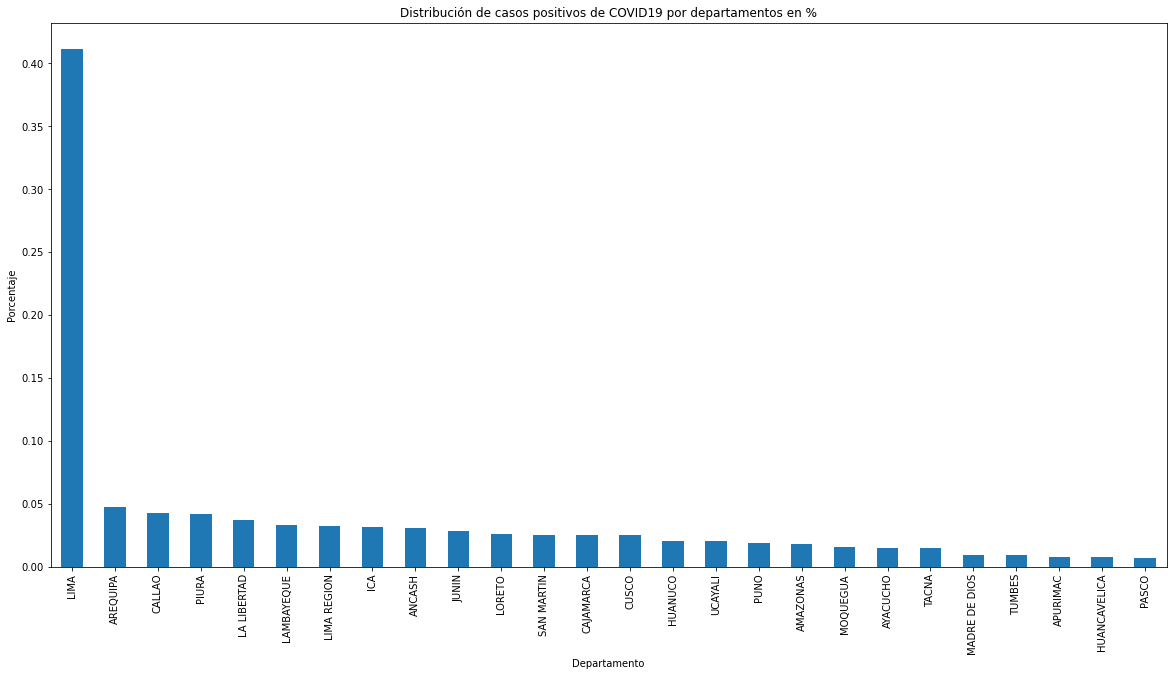

In [86]:
plt.figure(figsize=(20,10))
porcen_departamentos.plot(kind = 'bar', rot=0)
plt.xticks(range(len(porcen_departamentos)), list(porcen_departamentos.index.values),rotation=90)
plt.title("Distribución de casos positivos de COVID19 por departamentos en %")
plt.xlabel("Departamento")
plt.ylabel("Porcentaje")
plt.show()

## **Provincia**

In [87]:
ocurrencias_prov = df['PROVINCIA'].value_counts()
print(ocurrencias_prov)
print("Numero de provincias: ", ocurrencias_prov.shape[0])

LIMA                394864
EN INVESTIGACIÓN     55582
AREQUIPA             42274
CALLAO               41856
TRUJILLO             25623
                     ...  
ANTONIO RAIMONDI        54
CORONGO                 37
SUCRE                   36
CAJATAMBO               35
BOLIVAR                 18
Name: PROVINCIA, Length: 197, dtype: int64
Numero de provincias:  197


In [88]:
# Vemos en % 
porcen_provincias = df['PROVINCIA'].value_counts()/df.PROVINCIA.shape[0]
print(porcen_provincias)

LIMA                0.381443
EN INVESTIGACIÓN    0.053693
AREQUIPA            0.040837
CALLAO              0.040433
TRUJILLO            0.024752
                      ...   
ANTONIO RAIMONDI    0.000052
CORONGO             0.000036
SUCRE               0.000035
CAJATAMBO           0.000034
BOLIVAR             0.000017
Name: PROVINCIA, Length: 197, dtype: float64


In [89]:
# Vemos si hay provincias que tengan la misma cantidad de casos covid
ocurrencias_prov[ocurrencias_prov.duplicated(keep=False)]

HUARAZ                  6817
LAMBAYEQUE              6817
LUCANAS                  761
PATAZ                    761
SANDIA                   361
POMABAMBA                361
CHINCHEROS               358
CHURCAMPA                358
ANTABAMBA                127
RODRIGUEZ DE MENDOZA     127
PALLASCA                  83
OCROS                     83
Name: PROVINCIA, dtype: int64

In [90]:
# Agrupamos departamentos que tengan la misma cantidad de casos de covid
prov1 = ocurrencias_prov[ocurrencias_prov.duplicated(keep=False)]
prov1 = prov1.groupby(prov1.values.tolist()).apply(lambda x: x.index.tolist()).values.tolist()
print(prov1)
print(len(prov1))

[['PALLASCA', 'OCROS'], ['ANTABAMBA', 'RODRIGUEZ DE MENDOZA'], ['CHINCHEROS', 'CHURCAMPA'], ['SANDIA', 'POMABAMBA'], ['LUCANAS', 'PATAZ'], ['HUARAZ', 'LAMBAYEQUE']]
6


---

**Conclusión**: De las celdas anteriores podemos indicar que hay 12 departamentos dividosen 6 grupos , los cuales comparten en cada grupo el mismo número de infectados de COVID19, por ejemplo OCROS y PALLASCA tienen un total de 83 contagiados cada uno.

---



## **Distrito**

In [91]:
ocurrencias_dist = df['DISTRITO'].value_counts()
print(ocurrencias_dist)
print("Numero de distritos: ",ocurrencias_dist.shape[0])

EN INVESTIGACIÓN           55582
SAN JUAN DE LURIGANCHO     38277
LIMA                       34997
SAN MARTIN DE PORRES       26229
COMAS                      23224
                           ...  
SALAMANCA                      1
PEDRO VILCA APAZA              1
ABELARDO PARDO LEZAMETA        1
MACA                           1
HUANGASCAR                     1
Name: DISTRITO, Length: 1654, dtype: int64
Numero de distritos:  1654


In [92]:
# Vemos en % 
porcen_distritos = ocurrencias_dist/df.DISTRITO.shape[0]
print(porcen_distritos)

EN INVESTIGACIÓN           5.369287e-02
SAN JUAN DE LURIGANCHO     3.697604e-02
LIMA                       3.380752e-02
SAN MARTIN DE PORRES       2.533752e-02
COMAS                      2.243466e-02
                               ...     
SALAMANCA                  9.660118e-07
PEDRO VILCA APAZA          9.660118e-07
ABELARDO PARDO LEZAMETA    9.660118e-07
MACA                       9.660118e-07
HUANGASCAR                 9.660118e-07
Name: DISTRITO, Length: 1654, dtype: float64


In [93]:
# Vemos si hay distritos que tengan la misma cantidad de casos covid
ocurrencias_dist[ocurrencias_dist.duplicated(keep=False)]

HUAMACHUCO                 1467
PANGOA                     1467
VISTA ALEGRE                786
TIGRE                       786
CHOTA                       634
                           ... 
SALAMANCA                     1
PEDRO VILCA APAZA             1
ABELARDO PARDO LEZAMETA       1
MACA                          1
HUANGASCAR                    1
Name: DISTRITO, Length: 1302, dtype: int64

In [94]:
# Agrupamos distritos que tengan la misma cantidad de casos de covid
dist1 = ocurrencias_dist[ocurrencias_dist.duplicated(keep=False)]
dist1 = dist1.groupby(dist1.values.tolist()).apply(lambda x: x.index.tolist()).values.tolist()
#print(dist1)
print(len(dist1))

175


---


**Conclusión**: De las celdas anteriores podemos indicar que hay 1302 distritos divididos en 175 grupos , los cuales comparten en cada grupo el mismo número de infectados de COVID19.


---



## **Metododx**

In [95]:
print(df['METODODX'].value_counts())

PR     786042
PCR    247606
AG       1536
Name: METODODX, dtype: int64


## **Edad**

In [96]:
print(df['EDAD'].describe())

count    1.035126e+06
mean     4.201546e+01
std      1.808412e+01
min      0.000000e+00
25%      2.900000e+01
50%      4.100000e+01
75%      5.400000e+01
max      1.210000e+02
Name: EDAD, dtype: float64


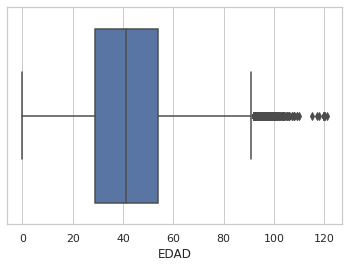

In [27]:
## Boxplot para Edad ##
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["EDAD"])

In [97]:
# Definimos los limites inferior y superior
limit_inf= round(int(df['EDAD'].describe()[4]) - 1.5*(int(df['EDAD'].describe()[6]) - int(df['EDAD'].describe()[4])))
limit_sup= round(int(df['EDAD'].describe()[6]) + 1.5*(int(df['EDAD'].describe()[6]) - int(df['EDAD'].describe()[4])))
print("El limite inferior es: ",limit_inf)
print("El limite superior es: ",limit_sup)

El limite inferior es:  -8
El limite superior es:  92


## **Sexo**

In [98]:
print(df['SEXO'].value_counts())

MASCULINO    533968
FEMENINO     501216
Name: SEXO, dtype: int64


In [99]:
sexos = df['SEXO'].value_counts()/df['SEXO'].shape[0]
print(sexos)

MASCULINO    0.515819
FEMENINO     0.484181
Name: SEXO, dtype: float64


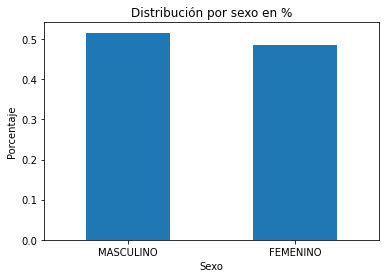

In [100]:
sexos.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['MASCULINO', 'FEMENINO'])
plt.title("Distribución por sexo en %")
plt.xlabel("Sexo")
plt.ylabel("Porcentaje")
plt.show()

# **2.Preprocesamiento**

### **2.1.Valores nulos**

In [101]:
df.shape

(1035184, 9)

In [102]:
# Vemos si hay valores repetidos
df = df.drop_duplicates()
df.shape

(1035184, 9)

In [103]:
# No hay valores repetidos

In [104]:
# Removemos columnas que no nos dan informacion
df = df.drop(['FECHA_CORTE','UUID','FECHA_RESULTADO'],axis = 1)
df.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO
0,TUMBES,ZARUMILLA,ZARUMILLA,PR,48.0,FEMENINO
1,TUMBES,ZARUMILLA,ZARUMILLA,PR,57.0,FEMENINO
2,TUMBES,ZARUMILLA,ZARUMILLA,PR,30.0,FEMENINO
3,TUMBES,ZARUMILLA,ZARUMILLA,PR,38.0,FEMENINO
4,UCAYALI,CORONEL PORTILLO,CALLERIA,PR,40.0,FEMENINO


In [105]:
# Valores nulos
df.isnull().sum()

DEPARTAMENTO     0
PROVINCIA        0
DISTRITO         0
METODODX         0
EDAD            58
SEXO             0
dtype: int64

In [106]:
# Eliminamos los valores nulos de la columna EDAD
df_new = df.copy() # Nuevo dataset
df_new.dropna(subset = ['EDAD'],inplace = True)

In [107]:
df_new.isnull().sum()

DEPARTAMENTO    0
PROVINCIA       0
DISTRITO        0
METODODX        0
EDAD            0
SEXO            0
dtype: int64

### **2.2.Valores atípicos**

In [108]:
# Eliminamos los valores que estan fuera de los limites del boxplot
df_new = df_new[(df_new.EDAD>limit_inf) & (df_new.EDAD<limit_sup)]

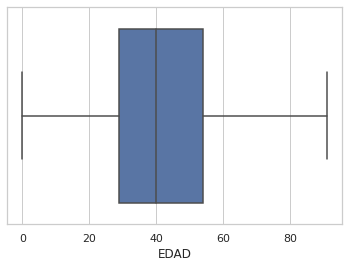

In [57]:
## Verificamos que ya no esten los valores atípicos ##
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_new["EDAD"])

In [109]:
df_new.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO
0,TUMBES,ZARUMILLA,ZARUMILLA,PR,48.0,FEMENINO
1,TUMBES,ZARUMILLA,ZARUMILLA,PR,57.0,FEMENINO
2,TUMBES,ZARUMILLA,ZARUMILLA,PR,30.0,FEMENINO
3,TUMBES,ZARUMILLA,ZARUMILLA,PR,38.0,FEMENINO
4,UCAYALI,CORONEL PORTILLO,CALLERIA,PR,40.0,FEMENINO


In [110]:
# Guardamos el dataset 
df_new.to_csv('./positivos_covid_procesado_v1.csv', index=False)

## 2.3.Variables categóricas

#### **2.3.1. Reemplazamos las variables categóricas por el ratio de aparición** 


---

Ya que las variables categóricas "departamento","provincia" y "distrito" toman muchos valores no es conveniente usar ONE-HOT encoding ya que la dimensión del dataset crecería demasiado, por eso reemplazaremos el valor de cada variable categórica por el ratio de aparición de cada una de ellas.


---



In [111]:
# Reemplazamos la variable categorica "departamento" por su ratio de aparición
departamento = (df_new["DEPARTAMENTO"].value_counts()/df_new["DEPARTAMENTO"].count()).to_dict()
#departamento

In [112]:
df_new["DEPARTAMENTO"].replace(departamento, inplace=True)

In [113]:
df_new.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO
0,0.009270,ZARUMILLA,ZARUMILLA,PR,48.0,FEMENINO
1,0.009270,ZARUMILLA,ZARUMILLA,PR,57.0,FEMENINO
2,0.009270,ZARUMILLA,ZARUMILLA,PR,30.0,FEMENINO
3,0.009270,ZARUMILLA,ZARUMILLA,PR,38.0,FEMENINO
4,0.019976,CORONEL PORTILLO,CALLERIA,PR,40.0,FEMENINO


In [114]:
# Reemplazamos la variable categorica "provincia" por su ratio
provincia = (df_new["PROVINCIA"].value_counts()/df_new["PROVINCIA"].count()).to_dict()
#provincia

In [115]:
df_new["PROVINCIA"].replace(provincia, inplace=True)

In [116]:
df_new.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO
0,0.009270,0.001550,ZARUMILLA,PR,48.0,FEMENINO
1,0.009270,0.001550,ZARUMILLA,PR,57.0,FEMENINO
2,0.009270,0.001550,ZARUMILLA,PR,30.0,FEMENINO
3,0.009270,0.001550,ZARUMILLA,PR,38.0,FEMENINO
4,0.019976,0.016152,CALLERIA,PR,40.0,FEMENINO


In [117]:
# Reemplazamos la variable categorica "distrito" por su ratio
distrito = (df_new["DISTRITO"].value_counts()/df_new["DISTRITO"].count()).to_dict()
#distrito

In [118]:
df_new["DISTRITO"].replace(distrito, inplace=True)

In [119]:
df_new.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO
0,0.009270,0.001550,0.000810,PR,48.0,FEMENINO
1,0.009270,0.001550,0.000810,PR,57.0,FEMENINO
2,0.009270,0.001550,0.000810,PR,30.0,FEMENINO
3,0.009270,0.001550,0.000810,PR,38.0,FEMENINO
4,0.019976,0.016152,0.008484,PR,40.0,FEMENINO


#### **2.3.2.Variables dummy**

---
Ya que las variables categóricas **"Metododx"** y **"Sexo"** no son ordinales y toman pocos valores usaremos ONE-HOT encoding para pasarlas a formato numérico.

---



In [120]:
# Generamos las variables dummy de METODODX y EDAD
METODODX_dummy=pd.get_dummies(df_new["METODODX"],prefix="METODODX")
SEXO_dummy=pd.get_dummies(df_new["SEXO"],prefix="SEXO")

In [121]:
#Unimos las variables tipo dummy al dataset original
df_new=pd.concat([df_new,METODODX_dummy],axis=1)
df_new=pd.concat([df_new,SEXO_dummy],axis=1)

In [122]:
# Eliminamos columnas METODODX Y SEXO
df_new.drop(['METODODX', 'SEXO'], axis='columns', inplace=True)

In [123]:
df_new.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,METODODX_AG,METODODX_PCR,METODODX_PR,SEXO_FEMENINO,SEXO_MASCULINO
0,0.009270,0.001550,0.000810,48.0,0,0,1,1,0
1,0.009270,0.001550,0.000810,57.0,0,0,1,1,0
2,0.009270,0.001550,0.000810,30.0,0,0,1,1,0
3,0.009270,0.001550,0.000810,38.0,0,0,1,1,0
4,0.019976,0.016152,0.008484,40.0,0,0,1,1,0


In [124]:
# Guardamos el dataset procesado
df_new.to_csv('./positivos_covid_procesado_v2.csv', index=False)

# **3.Número de clusters**

## **3.1.Normalización**

In [314]:
df_new = pd.read_csv('./positivos_covid_procesado_v2.csv')
df_new.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,METODODX_AG,METODODX_PCR,METODODX_PR,SEXO_FEMENINO,SEXO_MASCULINO
0,0.009270,0.001550,0.000810,48.0,0,0,1,1,0
1,0.009270,0.001550,0.000810,57.0,0,0,1,1,0
2,0.009270,0.001550,0.000810,30.0,0,0,1,1,0
3,0.009270,0.001550,0.000810,38.0,0,0,1,1,0
4,0.019976,0.016152,0.008484,40.0,0,0,1,1,0


In [315]:
columnas = df_new.columns.values
columnas

array(['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'EDAD', 'METODODX_AG',
       'METODODX_PCR', 'METODODX_PR', 'SEXO_FEMENINO', 'SEXO_MASCULINO'],
      dtype=object)

In [316]:
# Normalizamos el dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_new=pd.DataFrame(sc.fit_transform(df_new),columns=list(columnas))
df_new.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,METODODX_AG,METODODX_PCR,METODODX_PR,SEXO_FEMENINO,SEXO_MASCULINO
0,-0.940416,-0.872434,-0.826093,0.340831,-0.03857,-0.560444,0.562733,1.032371,-1.032371
1,-0.940416,-0.872434,-0.826093,0.842991,-0.03857,-0.560444,0.562733,1.032371,-1.032371
2,-0.940416,-0.872434,-0.826093,-0.663489,-0.03857,-0.560444,0.562733,1.032371,-1.032371
3,-0.940416,-0.872434,-0.826093,-0.217125,-0.03857,-0.560444,0.562733,1.032371,-1.032371
4,-0.883590,-0.790038,-0.269466,-0.105534,-0.03857,-0.560444,0.562733,1.032371,-1.032371


## **3.2.Método del codo**

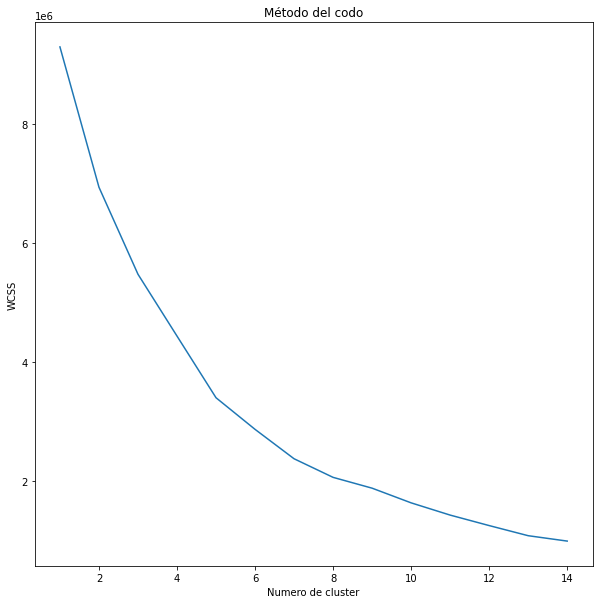

In [128]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.figure(figsize = (10,10))
plt.plot(range(1, 15), wcss)
plt.title('Método del codo')
plt.xlabel('Numero de cluster')
plt.ylabel('WCSS')
plt.show()

# **4.Kmeans**

In [317]:
# Creando el k-Means para los 7 grupos encontrados
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_new)

In [304]:
y_kmeans.shape

(1032697,)

In [318]:
np.unique(y_kmeans)

array([0, 1, 2, 3, 4, 5, 6])

## **4.1.Reportes**

In [319]:
# Número de instancias por clase
inst_class = pd.DataFrame(y_kmeans).value_counts()
cluster =[]
num_instancias =[]

for i in range(len(inst_class.values)):
  num_instancias.append(inst_class.values[i])
  cluster.append(inst_class.index.values[i][0])

instancias ={
    "Cluster":cluster,
    "Numero_observaciones":num_instancias
}

In [320]:
reporte1 = pd.DataFrame(instancias)
reporte1

,Cluster,Numero_observaciones
0,2,264232
1,0,252945
2,4,157957
3,3,136161
4,1,130988
5,5,88880
6,6,1534


In [321]:
# Centroides del cluster final
kmeans.cluster_centers_

array([[-8.35620380e-01, -7.94613251e-01, -4.10074731e-01,
        -7.24209352e-03, -3.85699450e-02, -5.60444405e-01,
         5.62732680e-01, -9.68643683e-01,  9.68643683e-01],
       [ 1.19278967e+00,  1.24438213e+00,  4.78435932e-01,
        -1.01014218e-02, -3.85699450e-02, -5.60444405e-01,
         5.62732680e-01,  1.03237136e+00, -1.03237136e+00],
       [-8.37249527e-01, -7.96017907e-01, -4.14773637e-01,
        -1.05678526e-01, -3.85699450e-02, -5.60444405e-01,
         5.62732680e-01,  1.03237136e+00, -1.03237136e+00],
       [ 1.19467190e+00,  1.24944672e+00,  4.80151427e-01,
         3.43149406e-02, -3.85699450e-02, -5.60444405e-01,
         5.62732680e-01, -9.68643683e-01,  9.68643683e-01],
       [ 1.18397400e+00,  9.33795537e-01,  7.98495564e-01,
         8.59665875e-02, -3.85699450e-02,  1.78429830e+00,
        -1.77704270e+00, -1.54477575e-01,  1.54477575e-01],
       [-8.29294647e-01, -7.84569653e-01, -4.60789384e-01,
         1.42702137e-01, -3.85699450e-02,  1.784298

# **5.Visualización de resultados**

In [380]:
# Etiquetas
np.unique(y_kmeans)

array([0, 1, 2, 3, 4, 5, 6])

In [323]:
# Juntamos el dataset original con la etiqueta cluster
df_final = pd.concat([pd.read_csv("./positivos_covid_procesado_v1.csv",sep = ","),
                    pd.DataFrame(y_kmeans)
                   ],axis=1)
df_final.rename(columns ={0:'CLUSTER'},inplace = True)
df_final.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,CLUSTER
0,TUMBES,ZARUMILLA,ZARUMILLA,PR,48.0,FEMENINO,2
1,TUMBES,ZARUMILLA,ZARUMILLA,PR,57.0,FEMENINO,2
2,TUMBES,ZARUMILLA,ZARUMILLA,PR,30.0,FEMENINO,2
3,TUMBES,ZARUMILLA,ZARUMILLA,PR,38.0,FEMENINO,2
4,UCAYALI,CORONEL PORTILLO,CALLERIA,PR,40.0,FEMENINO,2


In [324]:
# Guardamos el dataset final
df_final.to_csv("./positivos_covid_procesado_final.csv",index = False)

In [394]:
# Dividimos por cluster
cluster_0 =df_final[df_final["CLUSTER"] == 0]
cluster_1 =df_final[df_final["CLUSTER"] == 1]
cluster_2 =df_final[df_final["CLUSTER"] == 2]
cluster_3 =df_final[df_final["CLUSTER"] == 3]
cluster_4 =df_final[df_final["CLUSTER"] == 4]
cluster_5 =df_final[df_final["CLUSTER"] == 5]
cluster_6 =df_final[df_final["CLUSTER"] == 6]

In [395]:
# Número de departamentos por cluster
num_dpto = {}
for i in range(len(np.unique(y_kmeans))):
    cluster = str("Cluster")+str(i)
    num_dpto.setdefault(cluster,
                        len(df_final[df_final["CLUSTER"] == i]['DEPARTAMENTO'].value_counts())
                       )
num_dpto

{'Cluster0': 26,
 'Cluster1': 1,
 'Cluster2': 26,
 'Cluster3': 1,
 'Cluster4': 10,
 'Cluster5': 25,
 'Cluster6': 25}

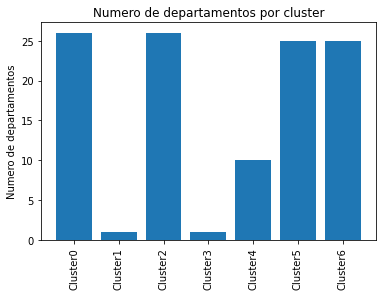

In [396]:
llaves = list(num_dpto.keys())
valores = list(num_dpto.values())
fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Numero de departamentos')
#Colocamos una etiqueta en el eje X
ax.set_title('Numero de departamentos por cluster')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
plt.bar(llaves, valores)
plt.xticks(rotation=90)
#plt.savefig('barras_simple.png')
#Finalmente mostramos la grafica con el metodo show()
plt.show()

In [ ]:
# Como se ve hay 4 cluster que presentan todos los departamentos
# Además los Cluster 1 y 3 solo tienen a Lima como departamento

In [383]:
# Analizamos los cluster 1 y 3
print(np.unique(cluster_1["DEPARTAMENTO"]),np.unique(cluster_1["PROVINCIA"]),np.unique(cluster_1["METODODX"]),np.unique(cluster_1["SEXO"]))
print(np.unique(cluster_3["DEPARTAMENTO"]),np.unique(cluster_3["PROVINCIA"]),np.unique(cluster_3["METODODX"]),np.unique(cluster_3["SEXO"]))

['LIMA'] ['EN INVESTIGACIÓN' 'LIMA'] ['PR'] ['FEMENINO']
['LIMA'] ['EN INVESTIGACIÓN' 'LIMA'] ['PR'] ['MASCULINO']


In [ ]:
# Se puede ver que el factor diferenciador para este par de cluster fue el sexo de las personas
# Ya que en las demás variables están iguales

In [451]:
# Analizamos el cluster 2, ya que es el que mayor numero de instancias tiene en le dataset
cluster_2['DEPARTAMENTO'].value_counts()[0:10]

PIURA          20595
AREQUIPA       20592
LA LIBERTAD    16556
CALLAO         15647
ICA            14784
LAMBAYEQUE     14663
JUNIN          13282
LIMA REGION    12823
ANCASH         12630
SAN MARTIN     12047
Name: DEPARTAMENTO, dtype: int64

In [452]:
cluster_2['PROVINCIA'].value_counts()

AREQUIPA            17425
CALLAO              14705
EN INVESTIGACIÓN    12242
TRUJILLO            10538
CHICLAYO             9580
                    ...  
CORONGO                23
CAJATAMBO              23
SUCRE                  17
LAURICOCHA             17
BOLIVAR                 7
Name: PROVINCIA, Length: 196, dtype: int64

In [453]:
cluster_2['DISTRITO'].value_counts()[0:12]

EN INVESTIGACIÓN    12242
CALLAO               8227
MOQUEGUA             4374
CALLERIA             4361
VENTANILLA           4338
CHICLAYO             4290
ICA                  3789
TRUJILLO             3704
CAJAMARCA            3650
PIURA                3603
JULIACA              3247
CHIMBOTE             3208
Name: DISTRITO, dtype: int64

In [449]:
# Analizamos el cluster 4
cluster_4['DEPARTAMENTO'].value_counts()[0:10]

LIMA            157116
CALLAO             443
HUANUCO            303
LIMA REGION         64
UCAYALI             20
LORETO               4
APURIMAC             3
CUSCO                2
HUANCAVELICA         1
JUNIN                1
Name: DEPARTAMENTO, dtype: int64

In [450]:
cluster_4['PROVINCIA'].value_counts()[0:10]

LIMA                129193
EN INVESTIGACIÓN     28764
Name: PROVINCIA, dtype: int64

In [448]:
cluster_4['DISTRITO'].value_counts()[0:10]

EN INVESTIGACIÓN           28764
SAN JUAN DE LURIGANCHO     10649
SAN MARTIN DE PORRES        9915
COMAS                       8267
LIMA                        8058
SANTIAGO DE SURCO           6393
LOS OLIVOS                  6095
SAN JUAN DE MIRAFLORES      5429
VILLA EL SALVADOR           5341
VILLA MARIA DEL TRIUNFO     5288
Name: DISTRITO, dtype: int64